In [1]:
import hmf, matplotlib.pyplot as plt, numpy as np
%matplotlib inline


Text(0,0.5,'N / Vol [Mpc^-3]')

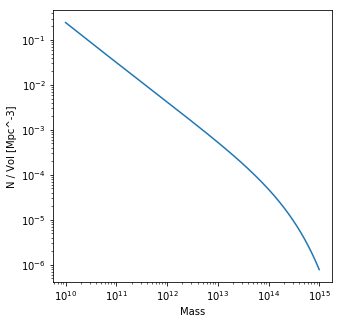

In [458]:
mymf = hmf.MassFunction()
f,a = plt.subplots(1,1,   figsize=(5,5))
mymf.z=0
dndlnm = mymf.dndlnm
logm = np.linspace(mymf.Mmin, mymf.Mmax, len(dndlnm))
a.plot(10.**logm, dndlnm)
mymf.z=0
mymf.Mmin=13
#mymf.Mmax=16
#dndlnm = mymf.dndlnm
#logm = np.linspace(mymf.Mmin, mymf.Mmax, len(dndlnm))
#a.plot(10.**logm, dndlnm)

a.set_xscale('log')
a.set_yscale('log')

a.set_xlabel('Mass')
a.set_ylabel('N / Vol [Mpc^-3]')

In [427]:
def well_resolved_objects(mass_dm=None, volume=None, min_parts=1e4,Nparts=None, tag=None):
    print()
    if tag: print(tag)
    if Nparts is not None and mass_dm is None:
        rhoavg = 3.3e10
        mass_dm = rhoavg*volume/Nparts
        print('mass_dm = %.1e'%mass_dm)
    min_mass = min_parts*mass_dm
    print('min mass = %.1e'%min_mass)
    mymf = hmf.MassFunction()
    mymf.z=0
    mymf.Mmin = np.log10(min_mass)
    mymf.Mmax = 16

    dndlnm = mymf.dndlnm
    N = np.trapz(dndlnm,np.log10(mymf.m)/np.log10(2.71828))*volume

    if Nparts is not None:
        print('rho = %.1e'%(mass_dm*Nparts/volume))
    print('N = %.2f ~ %.1e'%(N,N))
    return int(N)
        
#well_resolved_objects(mass_dm=7e8/.7, volume=(640/.7)**3, min_parts=1e4)
#well_resolved_objects(mass_dm=.5*(1e8/.7+2.7e9/.7), volume=(22./.7)**3, min_parts=1e4)
#well_resolved_objects(Nparts=4e6, volume=(100./.7)**3, min_parts=1e4)
#well_resolved_objects(Nparts=144**3, volume=(50./.7)**3, min_parts=1e4)
#well_resolved_objects(volume=(11./.7)**3, mass_dm =.5*(1.3+8.)*1e8/8. ,  min_parts=1e4)
#well_resolved_objects(Nparts=2*(100**3), volume=(11./.7)**3,   min_parts=1e4)
#well_resolved_objects(Nparts=2*(480**3), volume=(192./.7)**3,   min_parts=1e4)
#well_resolved_objects(Nparts=2*(512.**3), volume=(20./.7)**3,   min_parts=1e4)
#well_resolved_objects(mass_dm=.5*(7.4e5+4.e6), volume=(20./.7)**3,   min_parts=1e4)
#well_resolved_objects(Nparts=2*(1526**3), volume=(1244./.7)**3,   min_parts=1e4)


#well_resolved_objects(Nparts=2*(1584**3), volume=(352./.7)**3,   min_parts=1e4)
#well_resolved_objects(Nparts=2*(2880**3), volume=(909./.7)**3,   min_parts=1e4)

well_resolved_objects(mass_dm=8.6e8/.7, volume=(500./.7)**3,     min_parts=1e3, tag='millennium')

well_resolved_objects(mass_dm=6.8e6/.7, volume=(100./.7)**3,     min_parts=1e3, tag='millennium2')
well_resolved_objects(mass_dm=6.2e9/.7, volume=(3000./.7)**3,     min_parts=1e3, tag='millennium xxl')
well_resolved_objects(mass_dm=2.4e10/.7, volume=(2500./.7)**3,     min_parts=1e3, tag='big multi dark')
well_resolved_objects(mass_dm=1.3e8/.7, volume=(250./.7)**3,     min_parts=1e3, tag='bolshoi')
well_resolved_objects(mass_dm=7e10, volume=(4000./.7)**3,   min_parts=1e3, tag='hmd')

well_resolved_objects(mass_dm=4e9, volume=(4200)**3,   min_parts=1e3 , tag='hacc')

well_resolved_objects(Nparts=2*(1820**3), volume=(75)**3,   min_parts=1e4 , tag='illu100')
well_resolved_objects(Nparts=2*(2500**3), volume=(205)**3,   min_parts=1e4 , tag='illu300')

#well_resolved_objects(Nparts=2160**3,  volume=(500./.7)**3,   min_parts=1e4)

"""
"%.3e %.3e"%(
    (8.6e8/.7*2160**3/(500./.7)**3),
    (6.8e6/.7*2160**3)/(100./.7)**3)
"""


millennium
min mass = 1.2e+12
N = 1384977.49 ~ 1.4e+06

millennium2
min mass = 9.7e+09
N = 819392.05 ~ 8.2e+05

millennium xxl
min mass = 8.9e+12
N = 45441342.82 ~ 4.5e+07

big multi dark
min mass = 3.4e+13
N = 5963092.61 ~ 6.0e+06

bolshoi
min mass = 1.9e+11
N = 938485.97 ~ 9.4e+05

hmd
min mass = 7.0e+13
N = 9828930.00 ~ 9.8e+06

hacc
min mass = 4.0e+12
N = 93658783.87 ~ 9.4e+07

illu100
mass_dm = 1.2e+06
min mass = 1.2e+10
rho = 3.3e+10
N = 101658.37 ~ 1.0e+05

illu300
mass_dm = 9.1e+06
min mass = 9.1e+10
rho = 3.3e+10
N = 333516.60 ~ 3.3e+05


'\n"%.3e %.3e"%(\n    (8.6e8/.7*2160**3/(500./.7)**3),\n    (6.8e6/.7*2160**3)/(100./.7)**3)\n'

In [420]:
class O(object):
    def __init__(self, **kw):
        for k in kw:
            self.__dict__[k]=kw[k]
    def __getattr__(self, name):
        return None

In [461]:
simulations = [
    #O(ads="1970AJ.....75...13P", author="Peebles et al. 1970*", N=1,parts=300, size=3.2),
    #O(ads="1976MNRAS.177..717W", author="White et al. 1976", N=1,pars=700, size=3.2),
    O(ads="1994ApJ...437..564M", author="Metz et al. 1994", bao=True,  N=1, pars_dm=32768, pars_gas=28733, size=40./.7, m_dm=1.22e11/.7, m_gas=1.3e10/.7, gals=108 ),
    O(ads="1996ApJS..105...19K", author="Katz et al. 1996", bao=True, size=22.2/.7, N=7,  pars_dm=64**3, pars_gas=64**3,  m_gas=1e8/.7, m_dm=2.7e9/.7),
    O(ads="1999astro.ph..6032P", author="Pearce et al. 1999", bao=True, size=100./.7, N=34,  pars_dm=2e6, pars_gas=2e6,  m_gas=2e9/.7, m_dm=1.10/.7), #not sure mdm
    #O(ads="2002ApJ...571....1M", author="Murali et al. 2002", bao=True, size=50./.7, N=54,dyf=.6),
    O(ads="2003MNRAS.339..289S" , author="Springel et al. 2003", bao=True, size=50./.7, N=54,dyf=1.3),
    O(ads="2004MNRAS.348.1078B" , author="Borgani et al. 2004", bao=True, size=192./.7, N=4200,dyf=1.3),
    O(ads="2008ApJ...676...33D", author="Di Matteo et al. 2008", bao=True, size=50./.7,N=3827,dyf=.6),
    O(ads="2010MNRAS.402.1536S", author="Schaye et al. 2010", bao=True, size=50./.7,N=5352),
    O(ads="2011MNRAS.416.1354D", author="Dave et al. 2011", bao=True, size=48./.7,N=2007,dyf=.6),
    O(ads="2012MNRAS.423.3740V", author="Vogelsberger et al. 2012", bao=True, size=20./.7,N=3007),
    O(ads="2012MNRAS.423.2279C", author="Cui et al. 2012", bao=True, size=410./.7,N=41000,dyf=.7),
    O(ads="2014MNRAS.440.2610S", author="Saro et al. 2014", bao=True, m=True, N=58338), #1244 Mpc per side and contains 15263 d
    O(ads="2015MNRAS.451.4277D", author="Box0/mr", N=160742, bao=True, m=True),
    O(ads="2015MNRAS.451.4277D", author="Box2b/hr", N=969295, bao=True, m=True),
    
    O(ads="2018MNRAS.475..624N", year=2017, author="Illu. TNG100", N=101658, bao=True, m=True),
    O(ads="2018MNRAS.475..648P", year=2018, author="Illu. TNG300", N=333516, bao=True, m=True),
    
    O(ads="2005MNRAS.364.1105S", year=2003, author="Millennium", N=1384977.49),# up
    O(ads="2005MNRAS.364.1105S", year=2008, author="Millennium 2", N=1819392.05), #up
    O(ads="2005MNRAS.364.1105S", year=2010, author="Millennium XXL", N=45441342.82), #up
    O(ads="2011ApJ...740..102K", year=2010, author="Bolshoi", N=938485.97), #up
    O(ads="2012MNRAS.423.3018P", year=2012, author="Big Multi Dark",   N=5963092.61), #up
    O(ads="2012MNRAS.423.3018P", year=2013, author="Huge Multi Dark",  N=9828930.00), #up
    O(ads="2016NewA...42...49H", year=2016, author="HACC",  N=93658783.87), #up
    
    O(ads="2005MNRAS.360...27A", year=2000, author="SDSS DR1", obs=True, N=1e5,dyf=.5),
    O(ads="2005MNRAS.360...27A", year=2003, author="HI PASS", rad=True, N=5e3,dyf=1.5),
    O(year=2002, author="ALFALFA", rad=True, N=4e3,dyf=.5),
    O(ads="200MNRAS.360...27A", year=2007, author="SDSS DR 7", obs=True, N=929555,dyf=.5),
    
    O(ads="2017A%26A...606A.118H", year=2020, author="eROSITA (clusters)", rad=True, N=2e5,y=5),
    O(ads="2017A%26A...606A.118H", year=2020, author="eROSITA (AGNs)", rad=True, N=5e5,y=5),
    O(ads="2020MNRAS.360...27A", year=2021, author="Euclid", rad=True, N=1e8,y=6),
    O(year=2014, author="SDSS DR IVX", N=208478448, obs=True),
    O( author="ASKAP", year=2016, rad=True, N=6e5,y=3),
    #O( author="SDSS BOSS", year=2016, obs=True, N=1e6,dyf=.4),
    O( author="DESI 14hydrodynamical simk", year=2018, obs=True, N=2e7,y=4),
    O(ads="2014AnP...526..283D", year=2021, author="SKA1", rad=True, N=4e7,y=1),
    O(ads="2005MNRAS.360...27A", year=2025, author="SKA2", rad=True, N=1e9,y=1),
    
    
]

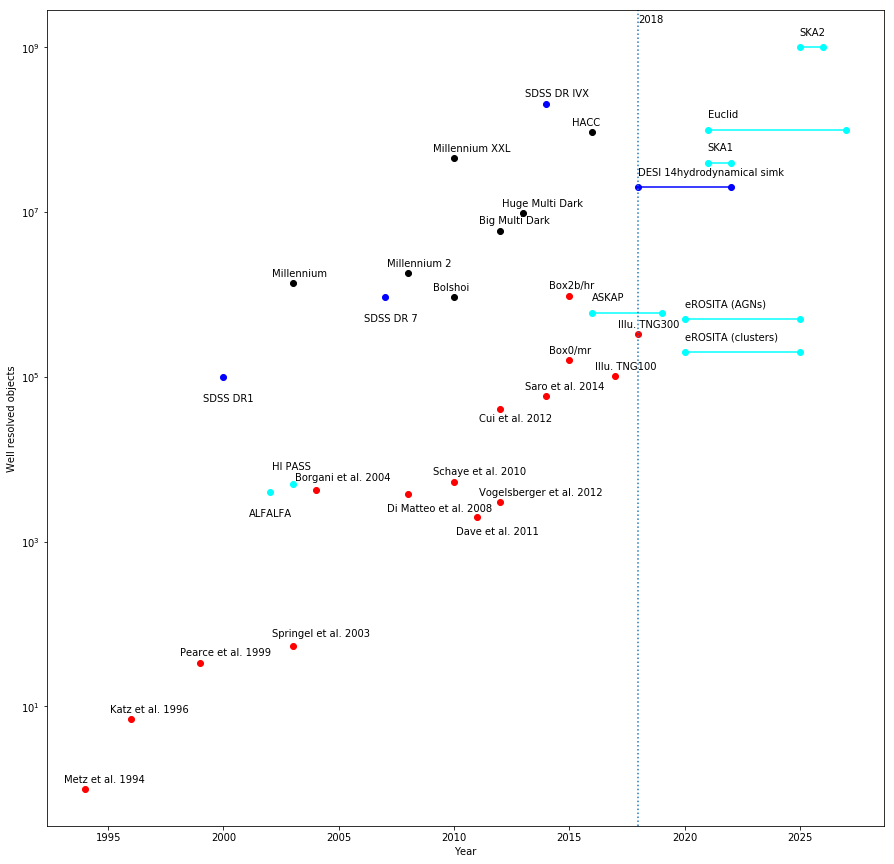

In [462]:
fig,a = plt.subplots(1,1, figsize=(15,15))
for simulation in simulations:
    if simulation.year:
        x= simulation.year
    else:
        x =int(simulation.ads[:4])
    y = simulation.N
    color='black'
    if simulation.obs:
        color='blue'
    if simulation.rad:
        color='cyan'
    if simulation.bao or simulation.m:
        color='red'
    if not simulation.y:
        a.plot(x,y,marker='o',color=color)
    else:
        a.plot([x,x+simulation.y],[y,y],marker='o',color=color)
    dyf=1.2
    dx=-.9
    if 'dyf' in simulation.__dict__:         dyf = simulation.dyf
    if 'dx' in simulation.__dict__:         dx = simulation.dx
    if not simulation.y:
        a.annotate(simulation.author, (x+dx,y*dyf), color='black')
    else:
        a.annotate(simulation.author, (x,y*1.4), color='black')
a.set_yscale('log')
a.set_ylabel('Well resolved objects')
a.set_xlabel('Year')


a.axvline(x=2018, linestyle=':')
a.annotate('2018', (2018, 2e9), color='black')
None

In [448]:
.5*(1.3e10+2.6e9)*2*(4536**3.)/(2688./.7)**3.


25712840917.96874

In [426]:
"%e"%25712840917

'2.571284e+10'

In [96]:
"N = %.1e"%(2*144**3), "M=%e"%(1e10/64)

('N = 6.0e+06', 'M=1.562500e+08')

In [88]:
"%e"%(64*1e6)

'6.400000e+07'